# 1.1 - Movielens full - EDA

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [116]:
# Path to data 
# Source for data: https://files.grouplens.org/datasets/movielens/ml-latest.zip
movies='movies.csv'
ratings='ratings.csv'

# Read data and define data types
df_movies=pd.read_csv(movies, usecols=['movieId', 'title'], dtype={'movieId':'int32','title':'str'}) 
df_ratings=pd.read_csv(ratings, usecols=['userId', 'movieId', 'rating'], dtype={'userId':'int32', 'movieId':'int32', 'rating':'float'})

# Display the first few rows of each DataFrame
print("First few rows of movies DataFrame:")
print(df_movies.head())
print("\nFirst few rows of ratings DataFrame:")
print(df_ratings.head())

First few rows of movies DataFrame:
   movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)

First few rows of ratings DataFrame:
   userId  movieId  rating
0       1        1     4.0
1       1      110     4.0
2       1      158     4.0
3       1      260     4.5
4       1      356     5.0


# A) Exploratory Data Analysis on movies and ratings data

86537
330975


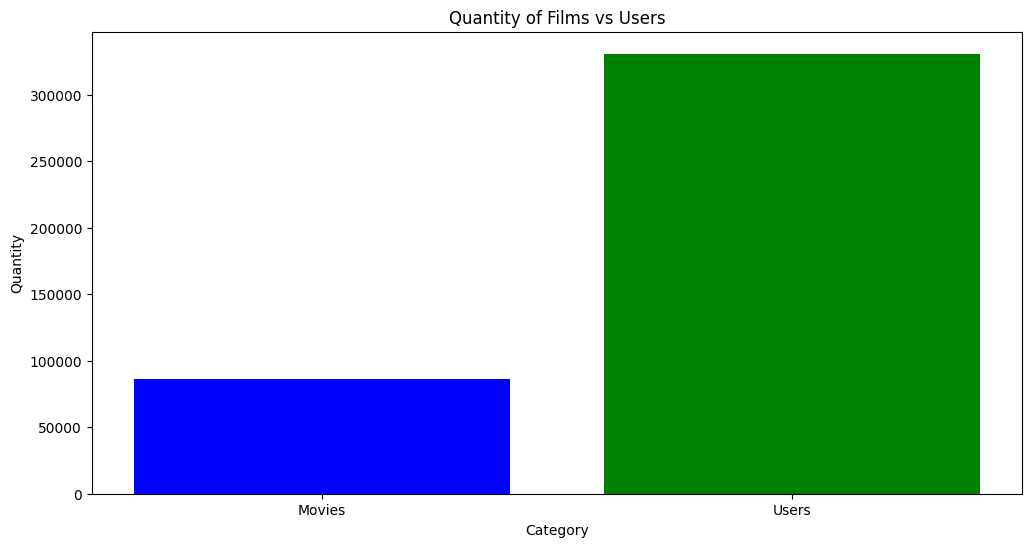

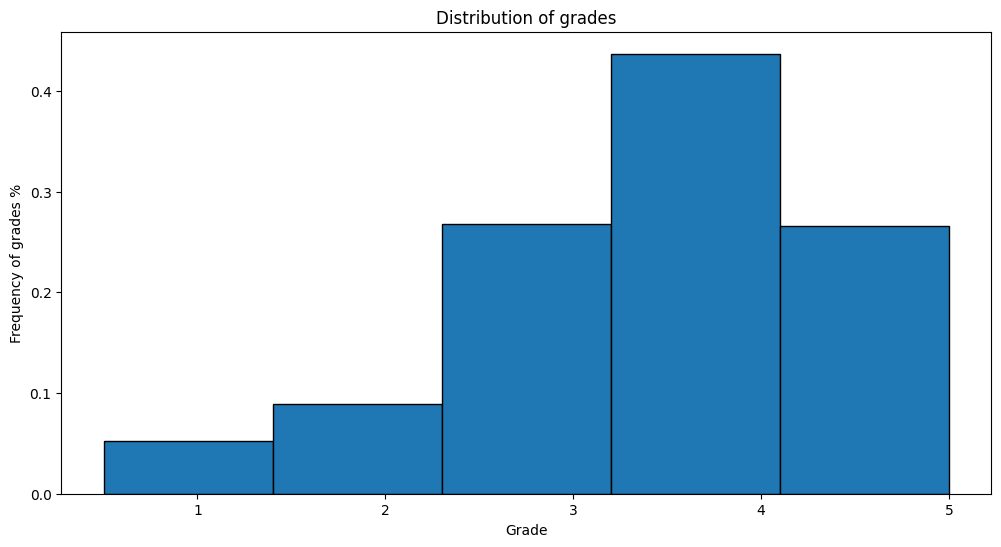

In [125]:
# Quantity of films and users
num_movies=df_movies['movieId'].nunique()
num_users=df_ratings['userId'].nunique()
print(num_movies)
print(num_users)

# Quantity of movies vs users in bar plot
plt.figure(figsize=(12, 6))
plt.bar(['Movies', 'Users'], [num_movies, num_users], color=['blue', 'green'])
plt.title('Quantity of Films vs Users')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

# Distribution of grades
plt.figure(figsize=(12, 6))
plt.hist(df_ratings['rating'], bins=5, edgecolor='black', density=True)  # Uppdaterad med density=True
plt.title('Distribution of grades')
plt.xlabel('Grade')
plt.ylabel('Frequency of grades %')
plt.xticks(range(1, 6))
plt.show()

# B) Sort top 10 movies with the most ratings 

In [118]:
# Group ratings by movieId and count the number of ratings for each movie
ratings_per_movie = df_ratings.groupby('movieId').size()

# Sort movies by the number of ratings in descending order and take the top 10
top_10_movies = ratings_per_movie.sort_values(ascending=False).head(10)

# Fetch the title for each movie from df_movies
top_10_movies_with_titles = top_10_movies.rename(index=df_movies.set_index('movieId')['title'])

# Print top 10 movies with the most ratings
print(top_10_movies)
#print(top_10_movies_with_titles)

movieId
318     122296
356     113581
296     108756
2571    107056
593     101802
260      97202
2959     86207
527      84232
480      83026
1196     80200
dtype: int64


# C) Calculate the average rating for the top 10 movies.

In [119]:
# Calculate the total sum of ratings for the top 10 movies
total_ratings_top_10_movies = top_10_movies.sum()

# Calculate the average of the total ratings by dividing the total sum by 10.
average_rating_top_10_movies = total_ratings_top_10_movies / len(top_10_movies_with_titles)

print("Average of the total ratings for the top 10 movies:", average_rating_top_10_movies)

Average of the total ratings for the top 10 movies: 98435.8


# D) Line graph plotting the quantity of movies over the years

year
1874       1
1878       2
1880       1
1882       1
1883       1
        ... 
2019    3058
2020    2628
2021    2297
2022    1962
2023     556
Name: count, Length: 142, dtype: int64


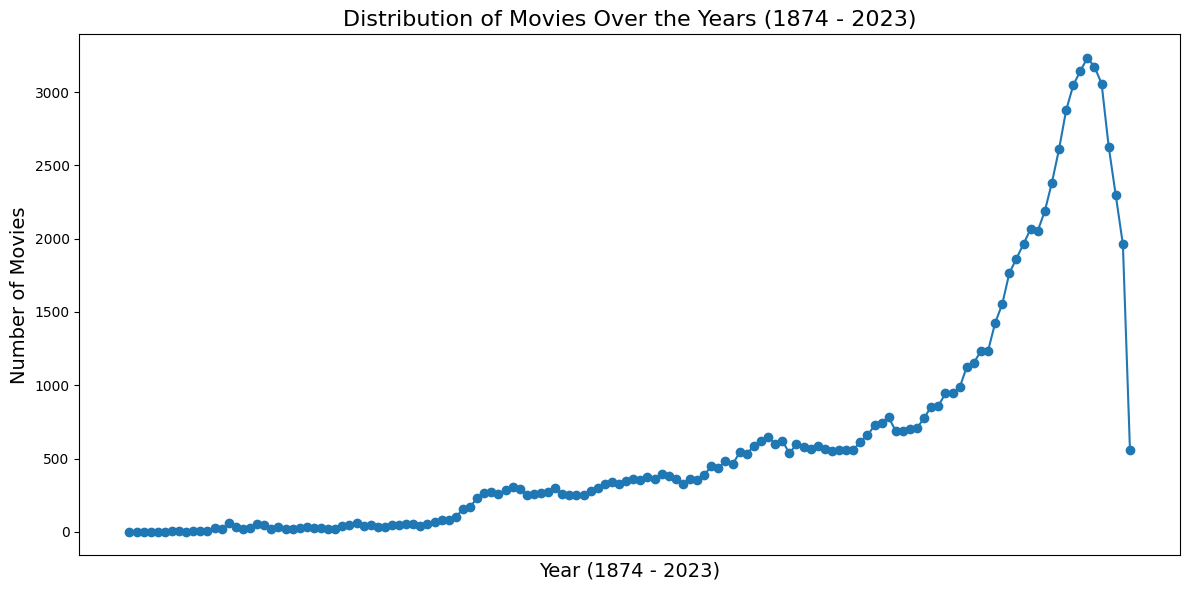

In [120]:
def extract_year(title):
    year_pattern = r'\((\d{4})\)'  # Regular expression pattern to match four-digit years within parentheses
    match = re.search(year_pattern, title)
    if match:
        return match.group(1)  # Extract the matched year
    else:
        return None  # Return None if no match is found

# Extract years from titles
df_movies['year'] = df_movies['title'].apply(extract_year)

# Count the occurrences of each year
movies_per_year = df_movies['year'].value_counts().sort_index()
print(movies_per_year)

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')

plt.xlabel('Year (1874 - 2023)', fontsize=14) 
plt.ylabel('Number of Movies', fontsize=14) 
plt.title(f'Distribution of Movies Over the Years (1874 - 2023)', fontsize=16) # Title

plt.xticks([])  # Remove x-axis labels

plt.tight_layout()
plt.show()

# E) Plot of the number of ratings against movieId

movieId
288983         1
204938         1
204942         1
204946         1
204952         1
           ...  
593       101802
2571      107056
296       108756
356       113581
318       122296
Length: 83239, dtype: int64


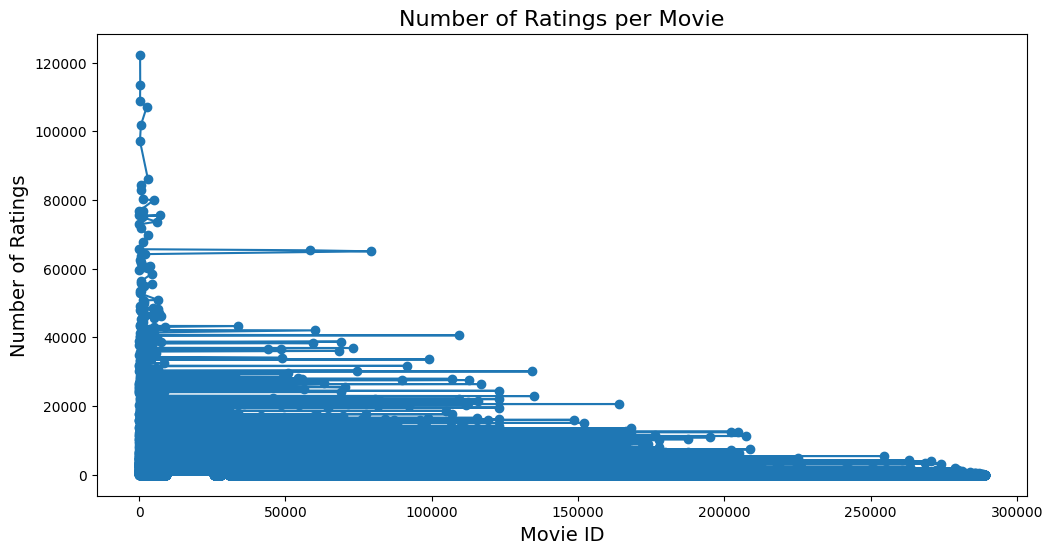

In [121]:
ratings_per_movie = df_ratings.groupby('movieId').size().sort_values(ascending=True) # Reusing and updating the old 'ratings_per_movie' with sorted values
print(ratings_per_movie)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ratings_per_movie.index, ratings_per_movie.values, marker='o', linestyle='-')
plt.xlabel('Movie ID', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.title('Number of Ratings per Movie', fontsize=16)
plt.show()

# F) Plotting the top 10 movies in a bar chart and outputting the average rating for these top 10 movies


Average rating of the top 10 movies: 98435.8


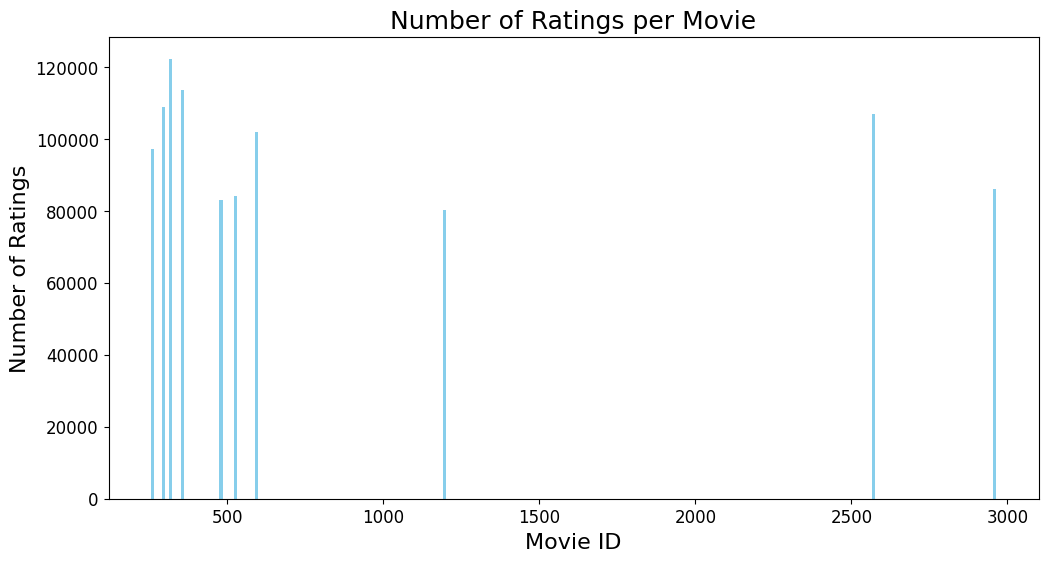

In [126]:
print("Average rating of the top 10 movies:", average_rating_top_10_movies)

# Plotting 
plt.figure(figsize=(12, 6)) 
plt.bar(top_10_movies.index, top_10_movies.values, color='skyblue', width=10)
plt.xlabel('Movie ID', fontsize=16)
plt.ylabel('Number of Ratings', fontsize=16)
plt.title('Number of Ratings per Movie', fontsize=18)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.show()